***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [5. Imaging](5_0_introduction.ipynb)  
    * Previous: [5. Introduction](5_0_introduction.ipynb)  
    * Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)

***

导入标准模块

Import standard modules:

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

导入本节特定模块

Import section specific modules:

In [48]:
import matplotlib.image as mpimg

In [49]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

***

## 5.1 空间频率<a id='imaging:sec:spatial'></a>

## 5.1 Spatial Frequencies<a id='imaging:sec:spatial'></a>

首先，真实天空跟可见度采样之间存在一个[van Cittert–Zernike theorem &#10142;](../4_Visibility_Space/4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)傅立叶关系，即对可见度采样做傅立叶变换得到天空图像，天空图像的傅立叶变换得到可见度采样。在深入研究射电干涉综合孔径成像之前，我们要先弄清楚空域（图像）和空间频率域（频域，可见度）之间的关系。为此，我们将从傅立叶变换开始，傅立叶变换是打通空域跟频域的数学基础。通过傅立叶变换实现两个信号在空域和频域之间的转换，了解信号在不同域里的模样。空域和频域的对应关系，是我们从干涉阵的可见度采样生成天空图像的基础。

To first approximation, the observed sky and sampled visibilites have a Fourier pair relationship via [van Cittert–Zernike theorem &#10142;](../4_Visibility_Space/4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb), that is the Fourier Transform of the sampled visibilites is an image of the observed sky, and the Fourier Transform of the observed sky image is the sampled visibilities. Before we dive into specifics of radio interferometric imaging using aperture synthesis, we will cover the ideas which relate the spatial domain (i.e. an image) to the spatial frequency domain (i.e. the visibilities). To do this we will start with the Fourier transform which is the mathematics that relate the two domains. Using that framework we will transform simple signals between the two domains to understand how the a signal in one domain appears in the other. This is the groundwork we need to understand before we can start constructing sky images from the observed visibilities of an interferometric array.

### 5.1.1 二维傅里叶变换<a id='imaging:sec:ft2d'></a>

### 5.1.1 The Fourier Transform in Two Dimensions<a id='imaging:sec:ft2d'></a>

我们将一些简单的数学公式入手，通过几个例子帮助大家快速理解傅立叶变换。

We will start with a bit of mathematics, but will soon move to some visual examples which are often more useful to get started to learn about Fourier transforms.

在[$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb)已经给出了一个连续的一维函数$f(x)$的傅立叶变换：

As described in [$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb) the Fourier Transform of a continuous, 1-dimensional function $f(x)$ is

\begin{equation}
g(t) = \int_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx
\end{equation}

一个离散的一维函数 $f(x)$的离散傅里叶变换 (DFT) [$\S$ 2.8 &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb)为：

The discrete Fourier transform (DFT) [$\S$ 2.8 &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb) of a discrete, 1-dimensional function $f(x)$ is

$$g(t) = \sum_{-\infty}^{\infty} f(x) e^{-2\pi i xt} dx$$

符号 $g \rightleftharpoons f$ 表示 $f$ 和 $g$ 是 *傅里叶对*，即，如果$g$ 是$f$的傅里叶变换, 则$f$是$g$的傅里叶逆变换.


The notation $g \rightleftharpoons f$ denotes that the function $f$ and $g$ are *Fourier pairs*, that is if $g$ is the Fourier transform of $f$, then $f$ is the inverse Fourier transform of $g$.

二维傅里叶变换是其各维度傅里叶变换的简单乘积（因为每个维度都是正交的）。

A 2-dimensional Fourier transform is simply the product of the Fourier Transform in each dimension (as each dimension is orthogonal).

$$ I(l,m) = \int_{-\infty}^{\infty} V_u(u) e^{-2\pi iul} \,du \int_{-\infty}^{\infty} V_v(v) e^{-2\pi ivm} \, dv = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) e^{-2\pi i(ul+vm)} \,du\,dv $$

根据欧拉公式 $e^{ix} = \cos x + i \sin x$，上式可以写成：

By Euler's forumla, $e^{ix} = \cos x + i \sin x$, this can be expanded to

$$ I(l,m) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,du\,dv $$

如果 $I(l,m)$ 代表一幅图像（一个离散的二维函数），那么它也可以表示为可见度 $V(u,v)$的傅里叶变换。根据欧拉公式，傅里叶变换是一系列被分解为正弦和余弦函数的可见度的集合。

If $I(l,m)$ represents an image, i.e. a discrete 2-dimensional function, then we see that $I(l,m)$ can be represented as the Fourier Transform of the visibilities $V(u,v)$. By Euler's formula the Fourier Transform is the decomposition of the visibilties into sine and cosine functions.

<a id="eq:dft2_IV"></a>
$$ I(l,m) = \sum_{u=-\infty}^{\infty} \sum_{v=-\infty}^{\infty} V(u,v) (\cos(2\pi(ul+vm)) - i\sin(2\pi(ul+vm))) \,\Delta u\,\Delta v $$

由于图像-可见度可以近似为一个 $I \rightleftharpoons V$的傅里叶对，因此可见度 $V(u,v)$ 可以被描述成图像 $I(l,m)$的正弦/余弦分解。

As the image-visibility relation can be approximated as a Fourier pair $I \rightleftharpoons V$, the visibilities $V(u,v)$ can be described as the sine/cosine decomposition of the image $I(l,m)$

<a id="eq:dft2_VI"></a>
$$ V(u,v) = \sum_{l=-1}^{1} \sum_{m=-1}^{1} I(l,m) (\cos(2\pi(ul+vm)) + i\sin(2\pi(ul+vm))) \,\Delta l\,\Delta m $$

图像和可见度之间的近似关系是综合孔径干涉测量的基础，可以从多种角度来理解这种关系。天空由”点源“构成，这些点源可以是恒星、星系或者星团，无论是哪种类型，都“不可解析”或者能用”delta 函数“来描述。公式 [above &#10549;](#eq:dft2_VI)表明，图像中的一个delta函数可以分解为可见度域的一系列正弦波，反之亦然。这意味着，为了探测到图像域里的一个点源，我们不需要对可见度空间做完整采样，换言之，一个域（图像域）里的稀疏信号在另一个域（可见度域）里密集，利用该原理，我们可以在一个密集空间进行测量，然后再把测到的量变换到一个你想要的稀疏空间。

The approximation of the relation between the image and visibilities is fundamental to using interferometry for aperture synthesis. There are many ways to interpret this relationship. A useful idea is that the sky is made up of mostly 'point source' objects which one might call stars or galaxies or blobs. Whatever these are, they are 'unresolved' sources or *delta functions*. Equation [above &#10549;](#eq:dft2_VI) states that a delta function in an image is a complex sinusoidal wave in the visibility domain and vica-versa. This means that one does not need to fully sample the visibility space to detect a point source in the image domain. Put in other words, this is an issue a signal being sparse in one domain (image) and dense in another domain (visibility). It is to our advantage to make a measurement in a domain where the signal is spread through-out the space and then transform the observed signal into a more preferable (but sparser) domain.

接下来我们通过几个例子来理解干涉成像的核心思想，建立起图像-可见度之间的傅立叶关系的直观印象。

To understand this concept which is the core of interferometric imaging lets look at a few examples which will hopefully start to create some intuition about the image-visibility Fourier relationship.

### 5.1.2 图像的傅里叶变换<a id='imaging:sec:ftImage'></a>

### 5.1.2 The Fourier Transform of an Image<a id='imaging:sec:ftImage'></a>


先看几张普通的图像。第一张是Umberto Boccioni的画作，名叫Dynamism of a Cyclist，另外一张是鸭子图，图中有一只完整雄性野鸭，和一只雌性野鸭的局部。

Let us start by looking at some generic images, the first is a painting by Umberto Boccioni called *Dynamism of a Cyclist* and the other is a duck (well, one full male mallard and part of a female mallard).

对这两张图进行傅立叶变换，看看变换后的结果。注意，本节我们用的都是离散傅立叶变换[fast Fourier Transform &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb)，而且假定信号采样是规则的（即网格的），我们将在 [$\S$ 5.3](5_3_gridding_and_degridding.ipynb)讨论非规则采样的网格化。

Let us start by looking at the effect applying a Fourier Transform to an image. Note, through out this section we will be using the discrete [fast Fourier Transform &#10142;](../2_Mathematical_Groundwork/2_8_the_discrete_fourier_transform.ipynb). The transformation of irregularly sampled visibilities to a regularly gridded array is discussed in [$\S$ 5.3](5_3_gridding_and_degridding.ipynb), for now we will only assume our signal is regularly sampled (i.e gridded).



In [51]:
#soccer = mpimg.imread('figures/WLA_moma_Umberto_Boccioni_Dynamism_of_a_Soccer_Player_1913_512.png')
cyclist = mpimg.imread('figures/Umberto_Boccioni_Dynamism_of_a_Cyclist_512.png')
duck = mpimg.imread('figures/Anas_platyrhynchos_male_female_quadrat_512.png')

简单起见，把RGB的彩色图转换成灰度图：

For simplicity convert the RGB-color images to grayscale:

In [46]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b #standard grayscale conversion
    return gray

gCyclist = rgb2gray(cyclist)
gDuck = rgb2gray(duck)

首先在空域（即我们通常所看到的域）中显示图像。这里用到了“空域”来描述信号。信号在空域中按照物理位置排列。例如，在下面的鸭子图中，鸭子的眼睛离头近离脚远，这跟我们在真实世界所看到的一样。这非常容易理解，
但是一旦进入到“频域空间”，我们就会丢失这种直觉，因此需要使用空域关系来重建认知。

Start by displaying the images in the *spatial domain*, i.e. the domain we usually look at images in. We use the term spatial domain to describe signals which are ordered by a distance which is directly related to the physical distance between the two signals, e.g. for the duck image below the eye is close to the head and far away from the foot as it is in the real world. This may seem like such a simple concept and you may wonder why the point is even being made. But, once we step into the *spatial frequency domain* our intution will be lost and we need to use the spatial domain relationship to try to regain our footing.

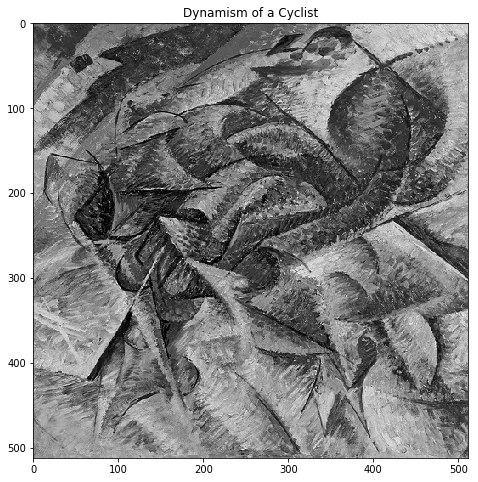

In [8]:
fig = plt.figure(figsize=(8,8))
plt.title('Dynamism of a Cyclist')
img0plot = plt.imshow(gCyclist)
img0plot.set_cmap('gray')
#fig.savefig("cyclist_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: Dynamism of a Cyclist by Umberto Boccioni*

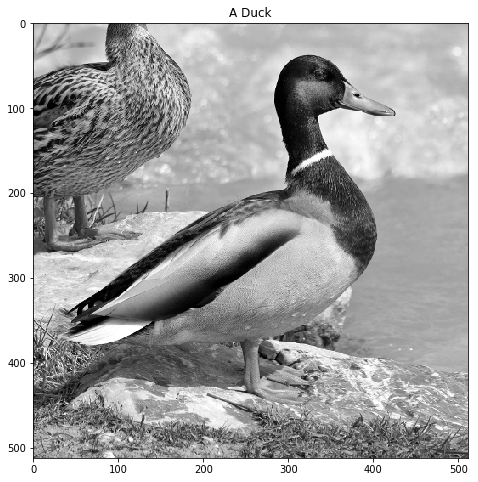

In [9]:
fig = plt.figure(figsize=(8,8))
plt.title('A Duck')
img1plot = plt.imshow(gDuck)
img1plot.set_cmap('gray')
#fig.savefig("duck_gray.png", bbox_inches='tight', pad_inches=0)

*Figure: A Duck*

在空域里，我们的眼睛和视觉清楚地告诉我们这是两张不同的图像，因为我们对空域信号已经非常熟悉，理解得也很深刻。

With our eyes and visual learning to understand signals in the spatial domian these are clearly two different images. This may seem like an obvious point, of course they are very different images, but that is because we have learned to understand signals in the spatial domain very well.

一个空域信号被分解成“空间频率域”的一系列正弦波，我们将在下一节用几个简单例子来深入理解空间频率域。这里可以用作画来打个简单的比方：我们正在用一些不同尺寸规格的刷子，用不同的笔触角度作画。频域的一个点可以看成是用某一规格的刷子以某一个笔触角度完成的总绘画量（这里是一个复数幂）。在频域空间，与中心距离相等的点代表刷子的规格相同，但是笔触角度不同，与中心的距离越远，刷子越小（可以画出精细部分），与中心的距离越近，刷子越大（用于画出大的结构，比如平坦的背景）。同时，跟小刷子相比，大刷子需要控制的笔触角度比较少，因此，对于一把大刷子来说，不需要太多的频域点。

The *spatial frequency domain* represents the decomposition of a spatial domain signal into complex sinusoidal waves. In the next section we will look at some simple examples which hopefully provide some insight into this domain. A useful metaphor here is to that of painting an image with a number different-sized paint brushes at different stroke angles. The painting is the spatial-domain image, and one can think of a point in the spatial-frequency domain as representing the amount of paint (in our case, a complex power) applied using a specific brush size at a specific stroke angle. In the spatial frequency domain, all points at the same radius represent the same sized paint brush but at all possible stroke angles. And, points further out represent smaller paint brushes (that is the brushes which can do fine details) compared to points closer to the centre which are for the large structures such as flat backgrounds. Additionally, not as much stroke angle control is required for the large paint brushes compared to the smaller brushes, so only a few points are need in the spatial frequency domain to fully represent a large brush.

接下来，我们通过一次二维傅立叶变换进入到频域空间。这是一个二维的复矩阵，靠近矩阵中心的像素点表征低频（图像的“大尺度”结构），远离矩阵中心的像素点表征高频（图像的“精细”结构），高频分量反映了图像的细节。

Now, let us take a step in the spatial frequency domain via a 2-dimensional Fourier Transform. This results in a complex 2-d array where the pixels closest to the centre of the array represent the low-frequency, or 'large-scale', structure of the original image. At the edge of the array are the high-frequency, or 'fine-scale', structure of the image. The high-frequency components represent the details of the image.

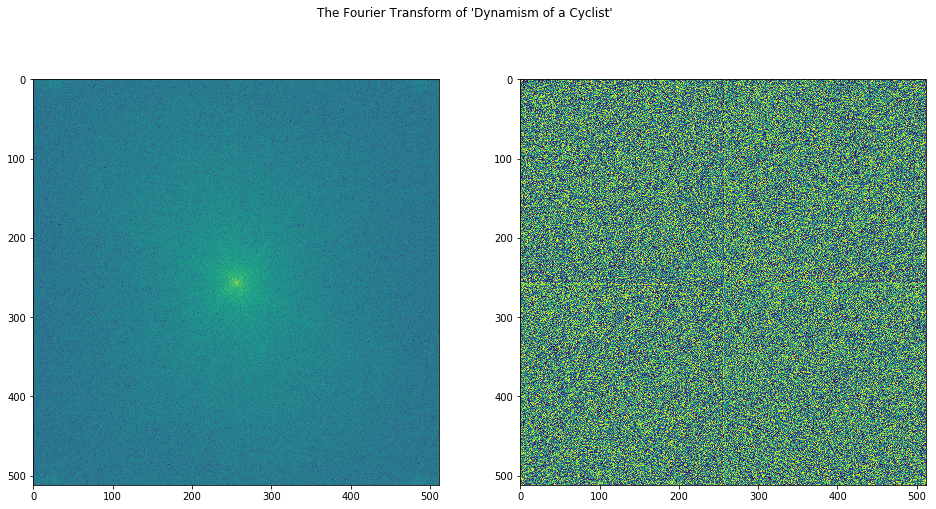

In [10]:
fftCyclist = np.fft.fftshift(np.fft.fft2(gCyclist))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of \'Dynamism of a Cyclist\'')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftCyclist))) #amplitude (decibels)
plt.subplot(1,2,2)
plt.imshow( np.angle(fftCyclist)) #phase
#fig.savefig("soccer_fft_gray.png", bbox_inches='tight', pad_inches=0)

*图：‘Dynamism of a Cyclist’的傅立叶变换结果，左图是幅值（分贝），右图是相位。Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of 'Dynamism of a Cyclist'*

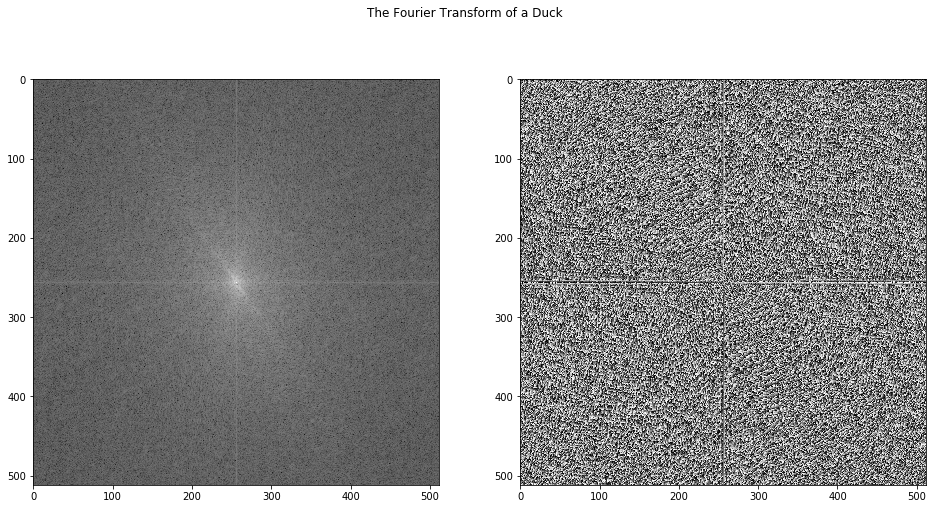

In [19]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))
fig, axes = plt.subplots(figsize=(16,8))
plt.suptitle('The Fourier Transform of a Duck')
plt.subplot(1,2,1)
plt.imshow( 10. * np.log10(np.abs(fftDuck))) #amplitude (decibels)
plt.set_cmap('gray')
plt.subplot(1,2,2)
plt.imshow(np.angle(fftDuck)) #phase
plt.set_cmap('gray')
#fig.savefig("duck_fft_gray.png", bbox_inches='tight', pad_inches=0)

*图：野鸭图的傅立叶变换结果，左图是幅值（分贝），右图是相位。Figure: Amplitude, in decibels, (left) and the phase (right) of the Fourier transform of a duck*

从左边的幅值图上可以看出多数能量集中在中间区域，即可以用大尺度或者低频正弦波来描述信号的主要成分。在绘制幅值图的时候，我们对幅值进行了对数变换，否则只能看到图中间的几个明亮的像素点。右图里的相位值范围从$-2\pi$ 到 $2\pi$，且相当随机，同时有一些穿过中心的连贯结构。从相位图上我们看出，越复杂的图（比如例子中的野鸭图），其相位结构也会很复杂。

As can be seen in the amplitude figures on the left the majority of the power is in the central region, i.e. the majority of the signal can be represented with large scale, or low-frequency sinusoidal waves. Try plotting the amplitudes without first rescaling them logarithmically and you should see only a few bright pixels in the middle of the figure. In the phase figures the values range from $-2\pi$ to $2\pi$ and are fairly random. There is some coherent structure that goes left to right and top to bottom passing through the centre of the figure. The main insight to gain from the phase figure is that given a complex image, of say a duck for example, leads to very complex phase structure.

那么相位核幅值哪一个更重要呢？这听上去似乎是一个很奇怪的问题，因为直觉告诉我们，幅值和相位都很重要，缺一不可。然而实际上却是相位更重要，因为相位包含了图像里大多数的结构信息，后面我们会对此进行解释。接下来我们交换一下两幅图的相位信息。

An interesting question to consider is 'which is more important, amplitude or phase?' This seems like an odd question, because intuition would seem to indicate that both amplitude and phase information is needed. It turns out that phase information contains most of the structural information. Let us start by taking a look at what this means, and then get into why this is the case. Start by switching the phase information of the two images.

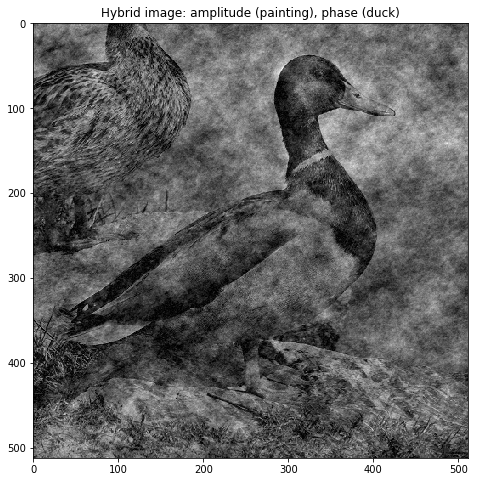

In [12]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (painting), phase (duck)')
phs = np.angle(fftDuck) #phase of the duck
amp = np.abs(fftCyclist) #amplitude of the painting
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a duck and amplitude of the painting
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_duck_amp_cyclist.png", bbox_inches='tight', pad_inches=0)

*图：'Dynamism of a Duck'，'Dynamism of a Cyclist'图的幅值+野鸭图的相位。Figure: 'Dynamism of a Duck', reconstructed hybrid image using the spatial frequency amplitudes of 'Dynamism of a Cyclist' and the phases of the duck.*

惊人的事情出现了：我们从两张图中各取一半的信息，组合起来得到的是鸭子而非那幅名为'Dynamism of a Cyclist'的画作，而且，组合图上完全看不到任何'Dynamism of a Cyclist'的信息。当我们把鸭子图的幅值跟'Dynamism of a Cyclist'的相位合成到一起，又只看到'Dynamism of a Cyclist'而非鸭子！

This seems kind of like an amazing thing to see, we have combined the two images (using half the information from each) and clearly we see a duck and not the painting. In fact, the painting is not visable at all. When we instead use the phase of the painting and the amplitude of the duck we now see the painting and not the duck.

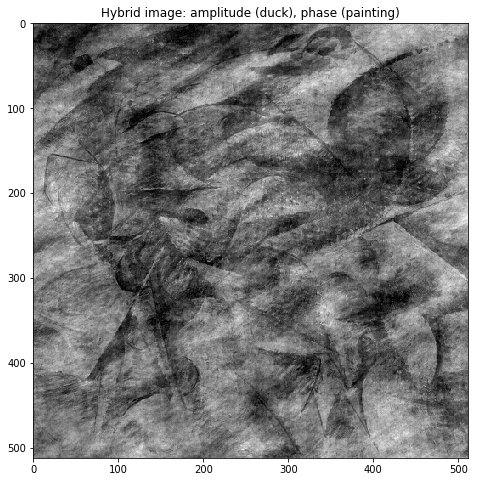

In [13]:
fig = plt.figure(figsize=(8,8))
plt.title('Hybrid image: amplitude (duck), phase (painting)')
phs = np.angle(fftCyclist) #phase of the painting
amp = np.abs(fftDuck) #amplitude of the duck
fftHybrid = amp * (np.cos(phs) + 1j * np.sin(phs)) #construct an image with the phase of a painting and amplitude of the duck
hybrid = np.abs(np.fft.ifft2(np.fft.fftshift(fftHybrid))) #compute the inverse Fourier Transform
hybridPlot = plt.imshow(hybrid)
hybridPlot.set_cmap('gray')
#fig.savefig("hybrid_phs_soccer_amp_duck.png", bbox_inches='tight', pad_inches=0)

*图：'Dynamism of a Duck (Redux)'，鸭子的幅值+'Dynamism of a Cyclist'的相位。Figure: 'Dynamism of a Duck (Redux)', reconstructed hybrid image using the spatial frequency amplitudes of the duck and the phases of 'Dynamism of a Cyclist'.*

在两张组合图里，相位都占据了主导地位，而且组合图都不如原图完美。跟原图相比，组合图里有噪声，这是由幅值造成的，因为两张原始图完全不相关，因此一张图的幅值和另一张图的相位不匹配。

Though with both hybrid images the image in which the phase is extracted from dominates they are not perfect reconstructions of only one image. In both there is now a sheen of noise across the images. The amplitude information plays a role. This noisiness of the hybrid image is due to the fact that the two original images are effectly uncorrelated, i.e. they are not related. So, one would not expect the amtplitude and phase information from one to match the other.

如果把鸭子图的幅值都置为1，而相位值维持不变，结果会怎么样呢？换言之，如果扔掉幅值信息，只保留相位信息，我们会得到怎样的结果呢？

What would happen if instead of swapping the amplitude information of the duck for the painting we just set all the amplitude of all the pixels to one? That is, we effectively throw out any amplitude information and make a phase information-only image?

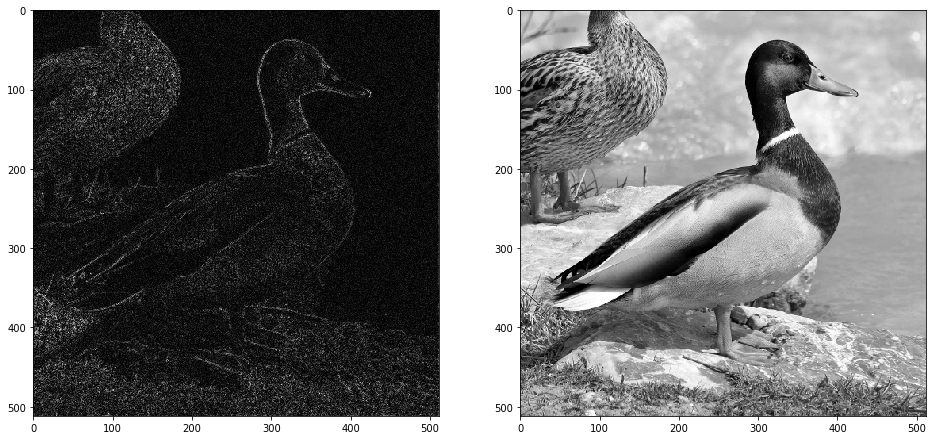

In [16]:
#fig = plt.figure(figsize=(8,8))
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Duck (phase-only)')
phs = np.angle(fftDuck)
amp = 1.*np.ones_like(fftDuck) #set all the amplitude values to 1
fftPhsImg0 = amp * (np.cos(phs) + 1j * np.sin(phs))
plt.subplot(1,2,1)
phsImg0 = np.abs(np.fft.ifft2(np.fft.fftshift(fftPhsImg0)))
phsImg0Plot = plt.imshow(phsImg0)
phsImg0Plot.set_cmap('gray')
plt.subplot(1,2,2)
img1plot = plt.imshow(gDuck)
img1plot.set_cmap('gray')
#fig.savefig("phs_only_duck.png", bbox_inches='tight', pad_inches=0)

*图：鸭子相位重建图。幅值都置为1。Figure: reconstructed image of a duck using only the phase information by setting all the amplitudes to unity.*

在只保留了相位信息的鸭子图中，依然能看到鸭子，但也出现了一些有趣的现象：只能看到类似细碎的羽毛这样的细节（即高频结构）以及轮廓（边缘）。后面将会看到，通过把幅值统一置为1，我们生成了一个“权重函数”，该函数突出了图中的精细结构（高频结构），弱化了大尺度结构（如背景里的水）。

The duck is still visibale when we only use the phase information, but now we see something interesting. Only the fine details (i.e. the high-frequency structure) like the little feathers and the outline (edges) are visible. We will get to this later in the chapter but by setting every ampltiude pixel to 1 we have created a *weighting function* which will favour the fine-scale or high-frequency structure in the image over the large-scale structure such as the background water.

接下来我们只保留幅值信息，把原图的相位都置为0，看看会出现什么效果。

Can we do the same trick with using only amplitude information, i.e. reconstruct the image after setting all the phases to zero?

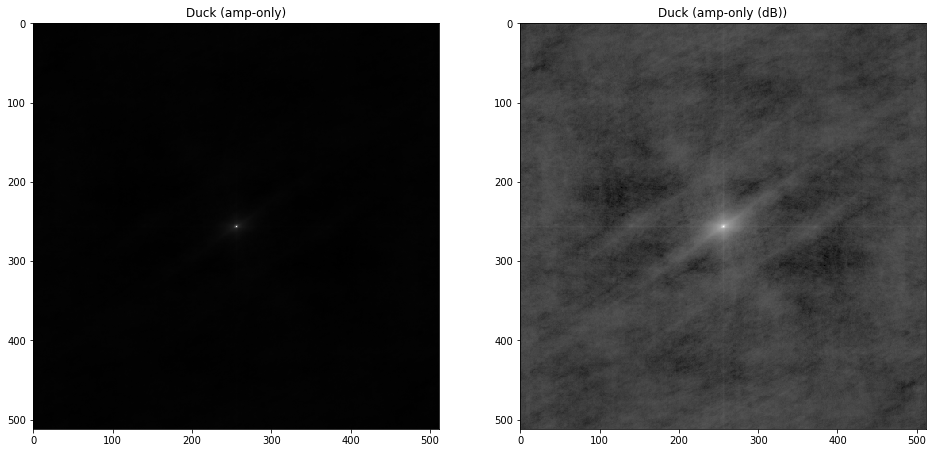

In [17]:
fig, axes = plt.subplots(figsize=(16,8))
plt.title('Duck (amplitude-only)')
phs = np.zeros_like(fftDuck) #set the phase information to 0
amp = np.abs(fftDuck)
fftAmpImg0 = amp

plt.subplot(1,2,1)
plt.title('Duck (amp-only)')
ampImg0 = np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))) 
#ampImg0 = np.abs(np.fft.ifft2(np.fft.fftshift(fftAmpImg0)))
ampImg0Plot = plt.imshow(ampImg0)
ampImg0Plot.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (amp-only (dB))')
ampImg0deci = 10.*np.log10(np.abs(np.fft.fftshift(np.fft.ifft2(fftAmpImg0))))
#ampImg0deci = 10.*np.log10(np.abs(np.fft.ifft2(np.fft.fftshift(fftAmpImg0))))

ampImg0deciPlot = plt.imshow(ampImg0deci)
ampImg0deciPlot.set_cmap('gray')
#fig.savefig("amp_only_duck.png", bbox_inches='tight', pad_inches=0)

*图：鸭子的幅值重建图（相位置为0）。左图为线性结果，右图做了对数变换（单位分贝）。Figure: reconstructed image of a duck using only the amplitude information by setting all the phases to zero. Left is in linear and right is in logarithmic (decibel) scale.*

事实证明，如果仅用幅值信息，得到的几乎是一张空图像，只在图像的中央区域有一些能量。对该图做对数变换，得到了跟之前傅立叶变换后的幅值图类似的图。这种现象可以解释为：相位描述了图像的结构，即能量的位置，幅值描述了结构的强度；所有正弦波的相长干涉和相消干涉产生了图像的结构，如果把这些正弦波的幅值都置为1，任然会产生干涉从而得到部分图像；但是，如果没有相位信息则不会发生干涉，图中将只有噪声。

As it turns out, using only the amplitude information results in an almost empty image with some power spread over the centre of the image. Taking the logarithm of the image results in something similar to the amplitude figure of the Fourier transformed image shown earlier in the section. A way to think about the phase and amplitude information is that phase information describes the structure of an image, that is, where the power needs to be placed. And ampltiude information describes the intensity of that structure given a position. The constructive and destructive interference of all the sinusoidal waves leads to a reconstruction of the image. If the amplitudes of all the sinusoidal waves is unity then there is still interference between the waves leading to a partial image. But, if that phase information is gone then there will be no interference and there will only be noise in the reconstructed image.

这是一个非常重要的思想，后面很快还会碰到，在讲到干涉测量可见度采样和权重函数的时候，我们将使用幅值从可见度中过滤出结构。这里我们只是简单提及，后面会有充足的时间深入讲解。

This is an important idea that will come up again soon when we consider interferometric visibility sampling and weighting functions. You will see that we can play with the amplitudes to filter structure out of visibilities. But, we are getting ahead of ourselves here, time enough for that later.

再来看看，如果我们只用实部或者虚部信息，合成的图会怎么样呢？

As an aside, what happens when we only use the real or imaginary information to reconstruct the image?

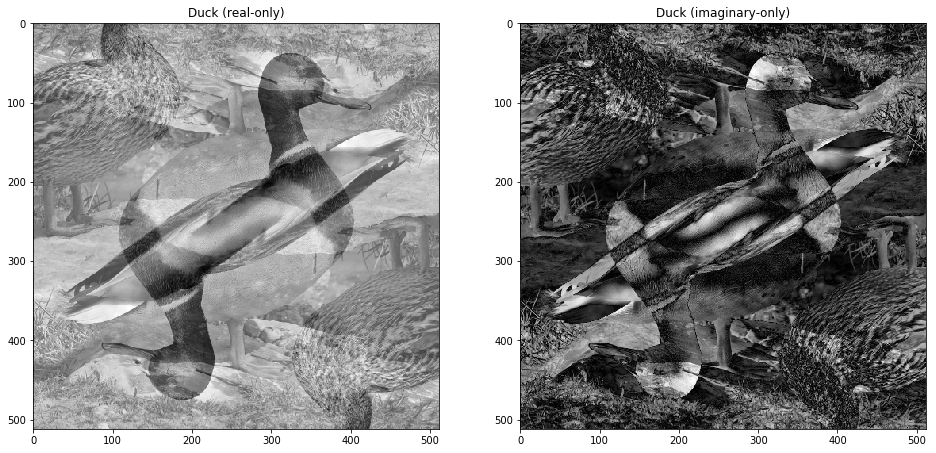

In [20]:
fig, axes = plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Duck (real-only)')
fftRealImg1 = fftDuck.real
realImg1 = np.abs(np.fft.ifft2(fftRealImg1))
#realImg1 = np.abs(np.fft.ifft2(np.fft.fftshift(fftRealImg1)))
plt.imshow(realImg1)
plt.set_cmap('gray')

plt.subplot(1,2,2)
plt.title('Duck (imaginary-only)')
fftImagImg1 =  fftDuck.imag
imagImg1 = np.abs(np.fft.ifft2(fftImagImg1))
plt.imshow(imagImg1)
plt.set_cmap('gray')

*图：只有实部（左）或虚部（右）的鸭子图。Figure: reconstructed image of a duck using only the real components (left) and imaginary components (right).*

结果看上去有点复杂，核心在于原始图像被严格实数化了，对这样的图像做傅立叶变换，信息量将翻倍，因为每个点都变成了复数（有实部和虚部）却没有增加新的信息（因为是线性变换）。经过傅立叶变换后的信号沿着对角线冗余，对角线上方的每个点都能在对角线下方找到对应值（共轭）。如果只用到实部，经过傅立叶变换回到空域，得到了原图+旋转$180^{\circ}$的图，为什么是“加”呢？因为共轭不影响实部的符号；如果只用到虚部，通过变换得到原-旋转$180^{\circ}$的图，因为共轭的虚部的符号相反。

There seems to be a lot going on here, but the core of this effect is that the original image is strictly real-valued. When the image is Fourier transformed the resulting signal is now 'twice' the information because it is complex (there is a real and imaginary component at each point) but no new information has been created as it is a linear transform. The Fourier transformed signal is redundant along a diagonal axis, each value above the diagonal has an equivalent (conjugated) value below the diagonal. Now if only the real-component is used to inverse Fourier transform back to the spatial domain then this results in an image which is the sum of the original image and a $180^{\circ}$ rotated image, this is an addition because conjugation does not effect the sign of the real components. The imaginary-component image is the difference image of the original and a $180^{\circ}$ rotated image because the conjugation flips the imaginary sign.

本节我们对一张含有复杂结构信息的图像做傅立叶变换，进入到一个陌生的领域，即频域。下一节我们将从简单结构入手，逐步得到图像。

The idea with this section has been to start with an image with a significant amount of structure (or information) which we can understand and then to transform that image into a new domain where our intution is lost. And, you may still be lost as we need to create some intution about the spatial frequency domain. In the next section we will start with simple structures to see how we can build up images out of basic components.

### 5.1.3 点源的傅立叶变换 The Fourier Transform of a Point Source<a id='imaging:sec:ftPoint'></a>

我们先不研究结构复杂的图像，而是对一些简单的图像做傅立叶变换，研究变换的效果。最简单的莫过于只有一个像素的空图，也被称为“点源”，因为这样的源不能被分解（只有一个像素甚至更小），点源位于图的中央，且强度为1。

Instead of looking at the Fourier Transform of an image with a large amount of structure let us examine a few simple images and the effect of applying a Fourier transform. The simpliest image one can make is an empty image with a single pixel, or what it is also called a *point source* as the source is not resolved (in this case the sizeof a single pixel or smaller), with unity intensity in the centre pixel.

FFT absMax: 100.0 absMin: 100.0
FFT phaseMax: 0.0 phaseMin: 0.0


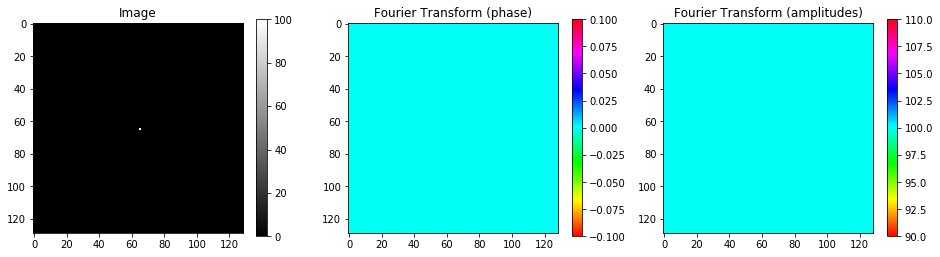

In [25]:
def pointSourceFFT(imgSize, ypos, xpos, amp=100.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,3,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,3,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)

    plt.subplot(1,3,3)
    plt.title('Fourier Transform (amplitudes)')
    plt.imshow(np.abs(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    #amplitudes are all 1.
    print('FFT absMax:', np.max(np.abs(fftImg)), 'absMin:', np.min(np.abs(fftImg)))
    print('FFT phaseMax:', np.max(np.angle(fftImg)), 'phaseMin:', np.min(np.angle(fftImg)))

imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1, (imgSize//2)+1)

*左：点源图，中心像素的亮度为1。右：点源在频域里的相位图，因为点源正好位于图的中心，所以所有相位值都为0。Left: a point source image, a simple image of a the centre pixel with unity intensity. Right: the spatial frequency phase of the point source image, all the phases are zero because the source is exactly in the middle of the image.*

一个只在中心像素点有值，其它像素点都为0的图像，相当于一个宽度为一个像素的二维卡方函数，随着图中像素点的增多，相应的卡方函数逐渐趋向于一个delta函数。而delta函数的傅立叶变换结果是一个常数场([$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb#math:sec:fourier_transform_of_diracs_delta_function))，输出的最大和最小幅值都为1。如果有值的像素位于图的中心，则变换后的相位也是常数。如果不在中心，相位将呈现出相应的“条纹模式”。点源左移一个像素，相位呈现出从左往右的条纹模式，而幅值保持不变。

An image with a single intensity pixel in the centre is equivalent to a 2-dimensional boxcar function with a width the size of the pixel, as the number of pixels in the image increases this approaches a delta function. The Fourier Transform of a delta function ([$\S$ 2.4 &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb#math:sec:fourier_transform_of_diracs_delta_function)) is a flat field of constant value as can be seen by printing the maximum and minimum amplitudes, they are both 1. When the pixel is at the centre of the image the phase is also flat, but as the position of the pixel is changed the phase will show a *fringe pattern* related to the position. Moving the source position by a single pixel to the left by one pixel the amplitude remains the same but now a fringe pattern appears left to right across the phase.

FFT absMax: 100.00000000000001 absMin: 99.99999999999999
FFT phaseMax: 3.1172392221666168 phaseMin: -3.1172392221666168


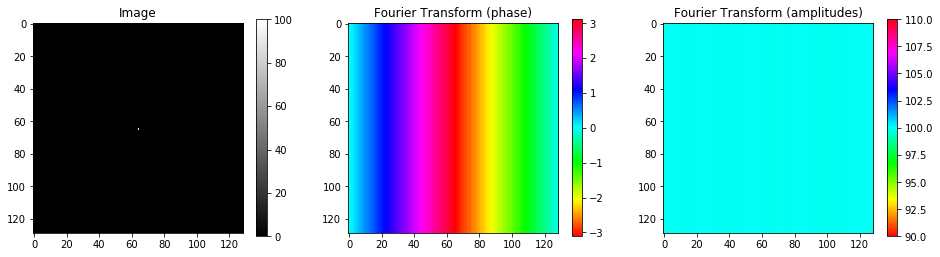

In [26]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1, (imgSize//2))

*左：点源图，点源位于图中央偏左一个像素位置，亮度为1；右：点源在频域空间的相位和幅值图。Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel to the left. Right: the spatial frequency phase of the point source image.*

从上面的相位图可以看出，在y方向上（x固定不变），相位为常数，但在x方向上，相位正好绕了一圈。

From the phase plot we see that the phase is constant in $y$ with respect to the a fixed $x$ position, and rotates around the unit circle once in the $x$ direction.

接下来，我们把源往下移动一个像素，条纹变成了从上往下的排列。

Instead, moving the position one pixel up from the centre the fringe pattern is now top to bottom.

FFT absMax: 100.00000000000001 absMin: 99.99999999999999
FFT phaseMax: 3.1172392221666168 phaseMin: -3.1172392221666168


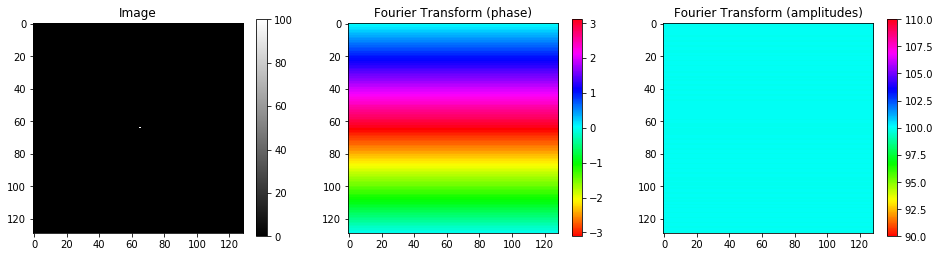

In [27]:
imgSize = 128
pointSourceFFT(imgSize, imgSize//2, (imgSize//2)+1)

*左：点源图，点源位于图的中央偏上一个像素位置，亮度为1；右：该点源的频域相位图。Left: a point source image, a simple image of a pixel with intensity 1, offset from the centre by one pixel up. Right: the spatial frequency phase of the point source image.*

从上面三个例子可以看出，点源的傅立叶变换的幅值始终维持不变，但是相位会发生改变。根据相位的方向，可以判断出点源在图像中心的哪个方向。接下来，我们再次异动点源，改变点源与图像中心的距离，观察相位的变化。

With the past three examples the minimum and maximum amplitudes have remained the same but we see different phase plots. The direction of the phase indicates the position of the point source relative to the centre of the image. Now we will see that by moving the point source away from the centre the phase frequency will increase.

FFT absMax: 100.00000000000001 absMin: 99.99999999999997
FFT phaseMax: 3.1172392221666163 phaseMin: -3.1172392221666168
FFT absMax: 100.00000000000001 absMin: 99.99999999999997
FFT phaseMax: 3.1172392221666168 phaseMin: -3.1172392221666168
FFT absMax: 100.00000000000003 absMin: 99.99999999999999
FFT phaseMax: 3.068532359320263 phaseMin: -3.068532359320263
FFT absMax: 100.00000000000001 absMin: 99.99999999999997
FFT phaseMax: 3.1172392221666168 phaseMin: -3.1172392221666163


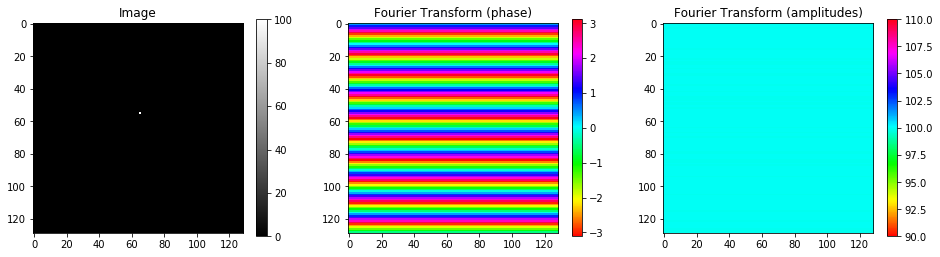

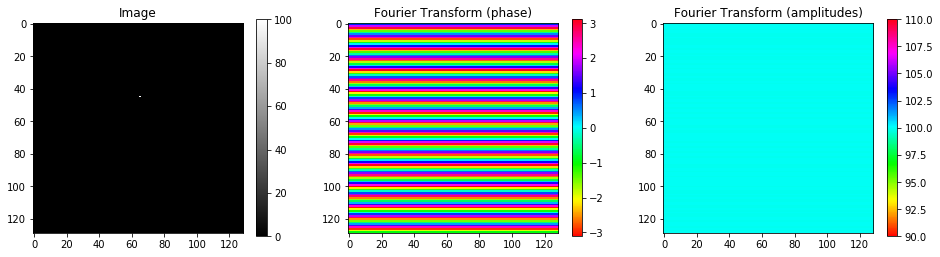

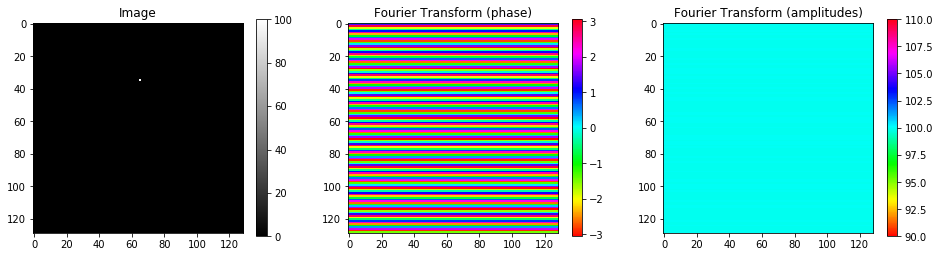

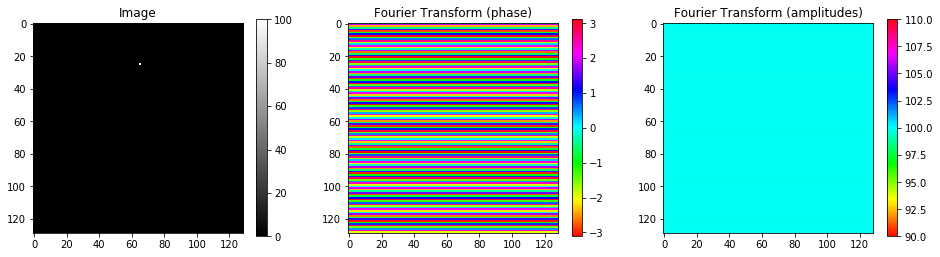

In [28]:
imgSize = 128
pointSourceFFT(imgSize, (imgSize//2)+1 - 10, (imgSize//2)+1) #offset the point source 10 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 20, (imgSize//2)+1) #offset the point source 20 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 30, (imgSize//2)+1) #offset the point source 30 pixels north above the centre

pointSourceFFT(imgSize, (imgSize//2)+1 - 40, (imgSize//2)+1) #offset the point source 40 pixels north above the centre

*左：逐步远离图像中心的点源图像。右：点源图像在频域的相位和幅值。Left: a point source image, a simple image of a pixel with intensity 1, progressively offset from the centre. Right: the spatial frequency phase of the point source image.*

可以看出，点源离图像中心越远，相位轮转越快，即条纹的频率越高。

The further the point source is from the centre the faster the phase rotates, one would also say that the fringe frequency increases.

固定点源与图像中心的距离，让点源绕中心一周，我们将看到，条纹的频率不变，但是方向会变。注意，左图里的圆线只是参考，并不是图像的一部分。

By fixing the distance of the point source to the phase centre but rotation the position around a circle we see that the frequency does not change but the direction of the fringe changes. Note, the circle is drawn on the plot for reference, but is not part of the image.

FFT Max: 1.0 Min: 0.9999999999999998
FFT Max: 1.0000000000000004 Min: 0.9999999999999994
FFT Max: 1.0 Min: 0.9999999999999998
FFT Max: 1.0000000000000002 Min: 0.9999999999999996
FFT Max: 1.0 Min: 0.9999999999999998


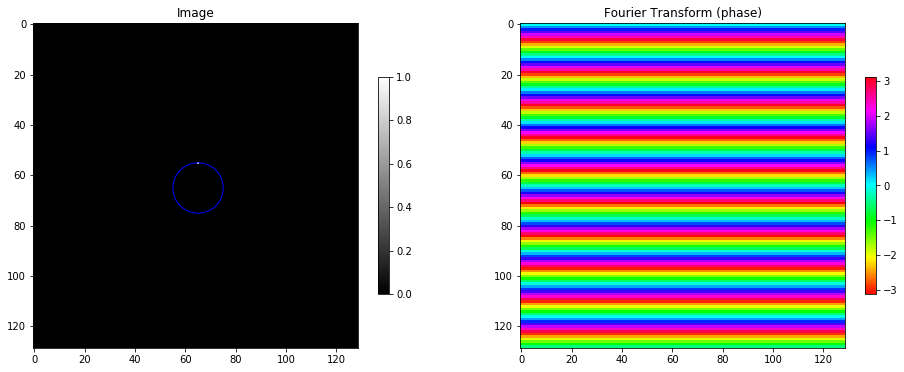

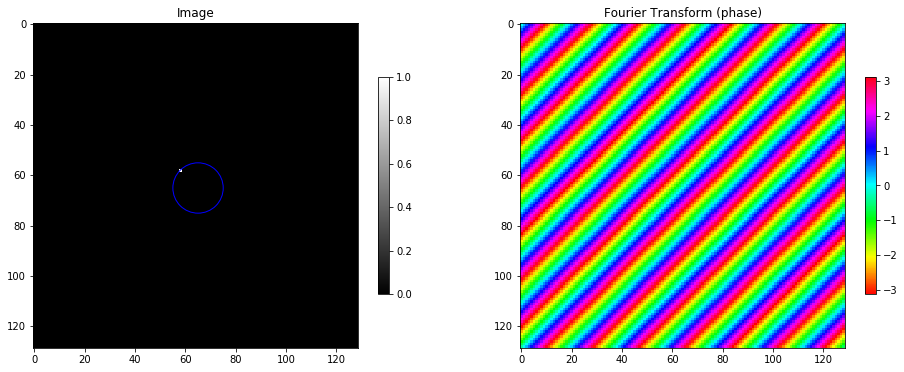

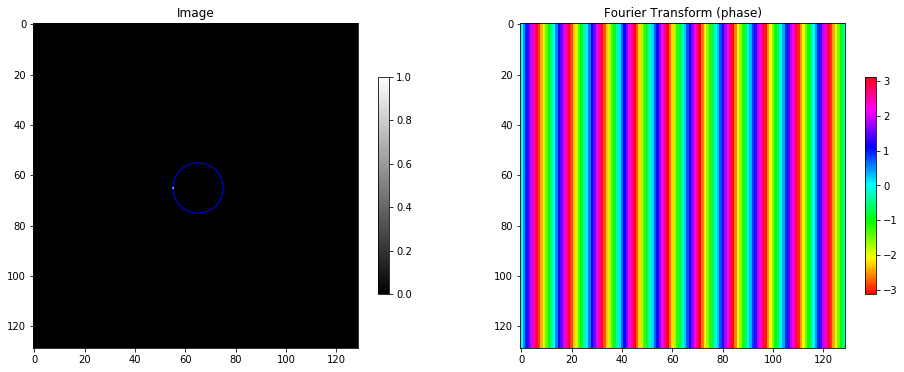

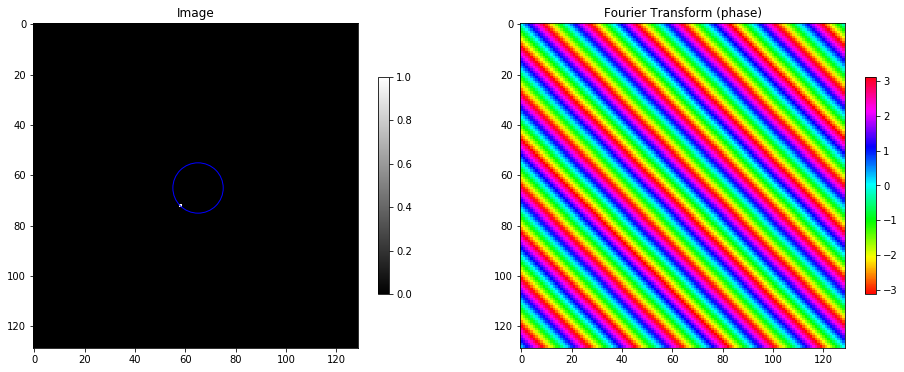

In [31]:
def pointSourceFFTCircle(imgSize, ypos, xpos, amp=1., radius=10.):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    img[ypos, xpos] = amp #make the central pixel have an intensity of 1
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
 
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1)
    plt.title('Image')
    c = plt.Circle(((imgSize/2)+1, (imgSize/2)+1), radius, color='blue', linewidth=1, fill=False)
    ax.add_patch(c)
    plt.imshow(img, interpolation='nearest')
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    ax = fig.add_subplot(1, 2, 2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    
    #amplitudes are all 1.
    print ('FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg)))

imgSize = 128
pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 10, (imgSize//2)+1 - 0, amp=1., radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 7, (imgSize//2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 - 0, (imgSize//2)+1 - 10, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 + 7, (imgSize//2)+1 - 7, amp=1.,radius=10.)

pointSourceFFTCircle(imgSize, (imgSize//2)+1 + 10, (imgSize//2)+1 - 0, amp=1.,radius=10.)

*左：点源图，图中只有一个值为1的像素，该点源绕图像中心转一周，半径为10个像素，蓝色圆圈只是参考，并不是图的一部分。右：频域里的相位图。Left: a point source image, a simple image of a pixel with intensity 1, rotated around a 10 pixel radius circle. The blue circle is plotted for reference. Right: the spatial frequency phase of the point source image.*

上面例子里的第一张和最后一张相位图很相像，但是相位的方向正好相反，图中的每个点都有相应的共轭点。

In the top plot where the point source is 10 pixels above the centre has a similar phase plot to that of the last figure where the source is 10 pixels below the centre, but looking carefully the phase is rotating in the opposite direction. For every point in the image there is another point which makes up a conjugated pair.

通过上面这些简单的例子，我们可以看出稀疏性在不同域的表现。图像域里只需要一个位置和亮度就能描述出一个点源，即图像是稀疏的。但是，把该图像变换到频域以后，我们得到了每个像素点的相位和幅值，即信息覆盖了整个频域空间的每个像素，信息变得密集了。然而，真正的点源是一个delta函数，只能通过无数正弦余弦波重建而成，我们这里用一个像素点表示点源，其实带有一点欺骗性。

Now from these simple image examples we can see something about how sparsity works in different domains. In the image domain a single point source can be described by only a position and intensity value, i.e. we would say the image is sparse. But, transforming that image in the spatial frequency domain means that we now need to know the phase and amplitude of every pixel. That is, the information has been spread out over every pixel, in the spatial frequency domain the point source signal is now dense. This comes about because a true point-source, i.e. a delta function, can only be reconstructed by an infinite set of complex sinusoidal waves. We have been cheating a bit here by using a point source which actually has a size in these examples. That is, the point source has a size which is a pixel in length in the $x$ and $y$ direction.

由此推断出，如果我们感兴趣的信号大多数来自点源，那么这些信号将分布到整个频域空间，因此我们不需要知道该信号的确切位置。在预先知道源的情况下，甚至不需要对整个频域做完整测量就能重建出天空的图像。这些内容后面会讲到。



As a hint about what lays in store, if we know that the signal we are interested in is mostly point source-like then we know that the signal will be spread across the spatial frequency domain and we don't need to know exactly where that signal is. We don't even need to fully measure the spatial frequency domain if we make assumptions about what the source is to reconstruct the the image of the sky we are interested in. But, this is for later.

### 5.1.4 两个点源的傅立叶变换 The Fourier Transform of Two Point Sources<a id='imaging:sec:ft2Point'></a>

通过上面的例子，我们知道到了一个点源的图像以及点源位置对可见度的影响。接下来，我们将引入第二个点源。

Now that we have looked at the simple case of a single point source image and how moving that source around the image changes the visibilities, we will get a bit more complex by introducing a second point source. A small step, but that is what we need at the moment.

对有两个点源（每个源的幅值都为1）的图像做傅立叶变换，相位是每个点源相位的平均。

The spatial frequency phases of two point sources, each with unity amplitude, is the average of the phases of each individual point source.

FFT Max: 2.0 Min: 0.02435282960399509
FFT Max: 2.0 Min: 0.02435282960399497
FFT Max: 2.0 Min: 0.02435282960399484


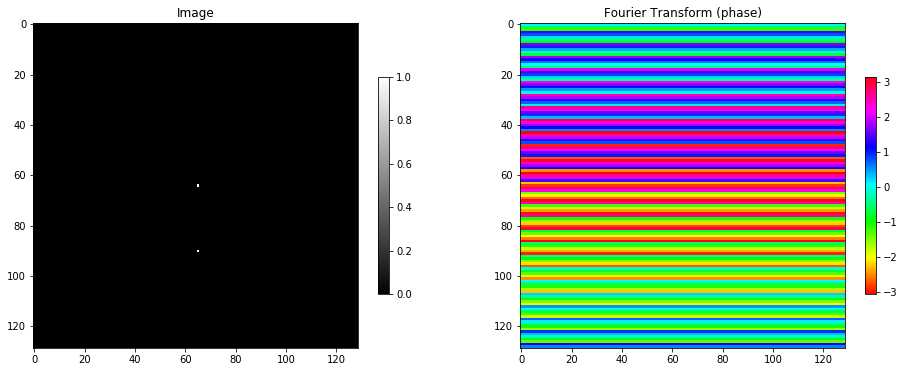

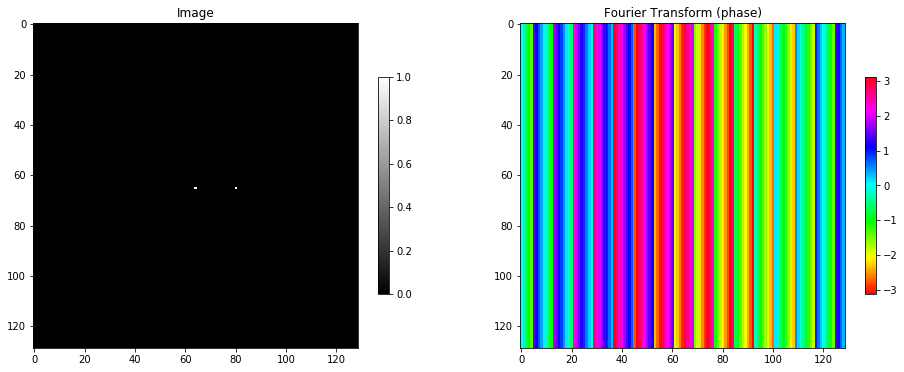

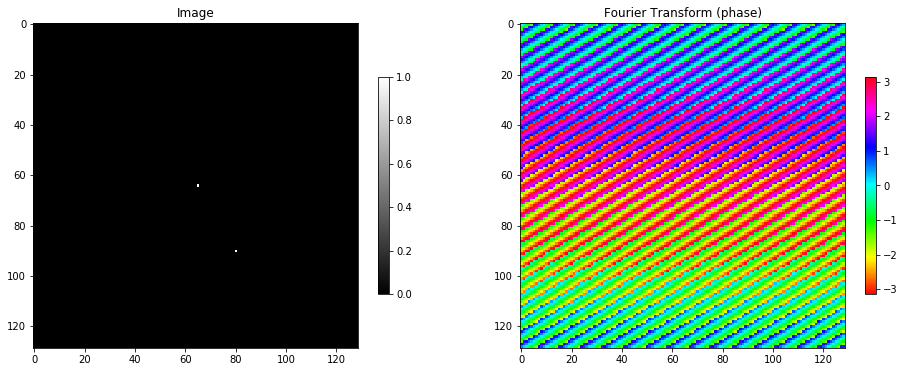

In [59]:
def multipleSourcesFFT(imgSize, pos, amp):
    img = np.zeros((imgSize+1, imgSize+1)) #odd sized array such that there is a central pixel
    for p,a in zip(pos, amp):
        img[p[0], p[1]] = a #make the central pixel have an intensity of a
    
    fftImg = np.fft.fft2(np.fft.fftshift(img)) #compute the Fourier transform of the image
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Image')
    plt.imshow(img, interpolation='nearest')
    #plt.imshow(10.*np.log10(img), interpolation='nearest') #分贝单位
    plt.set_cmap('gray')
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1,2,2)
    plt.title('Fourier Transform (phase)')
    plt.imshow(np.angle(fftImg))
    plt.set_cmap('hsv')
    plt.colorbar(shrink=0.5)
    

    print('FFT Max:', np.max(np.abs(fftImg)), 'Min:', np.min(np.abs(fftImg)))

imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,65]], [1., 1.])

multipleSourcesFFT(imgSize, [[65, 64], [65,80]], [1., 1.])

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.])

*左：双点源图，点源幅值为1。右：双点源的相位。Left: position of two point sources, each with an amplitude of 1. Right: the resulting spatial frequency phases.*

很明显，右边的相位图中有两个不同的正弦波。第一个波来源于左图中紧临图像中心的点源，从上到下变化缓慢。第二个波来源于另一个距离中心较远的点源，其方向和变换快慢取决于该点源的位置。当两个源在x方向对齐时，相位变化的方向从上往下（上图），当在y方向对齐时，相位变化方向为从左往右（中图），当另一个点源位于中心的右下方时，相位的波是斜的（下图）。

From these figures we can see there are two different sinusoidal waves in the phase plots, The first is a slowly varying wave going top to bottom due to the source near the centre of the image. The second wave changes frequency and direction based on the position of the second source. From the first row we can see that because the sources are aligned in $x$, then the phase of both goes top to bottom, but at different frequencies. Similarly, in the second row, the sources are aligned in $y$ and thus both phases go left to right. In the third row we see that the phase is at an angle because of the second source position.

现在，我们不对相位做简单的加法，而是根据源的幅度值做加权平均。在上面的例子里，由于两个源的幅值相同，所以简单平均就等于加权平均。

接下来，改变两个源的幅值。

Now, the phases are not added equally, the average phase value at each spatial frequency is a weighted average of each source based on the amplitude of that source. In the previous examples both sources had the same amplitude so the phases were simply an average.

FFT Max: 1.1 Min: 0.900032947191919
FFT Max: 2.0 Min: 0.02435282960399484
FFT Max: 11.000000000000002 Min: 9.000329471919189


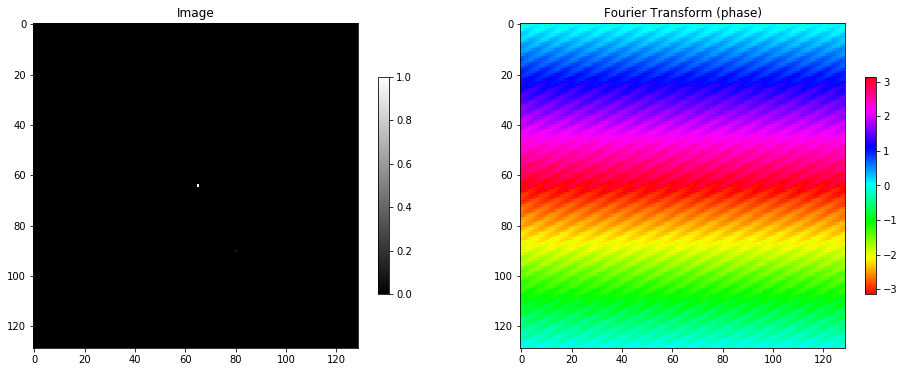

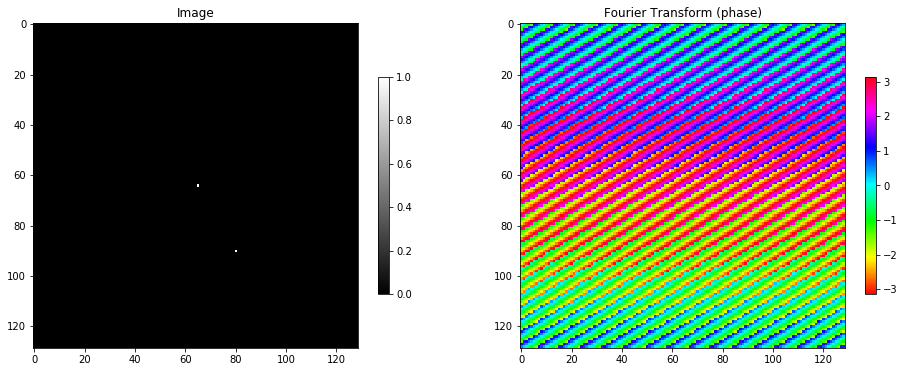

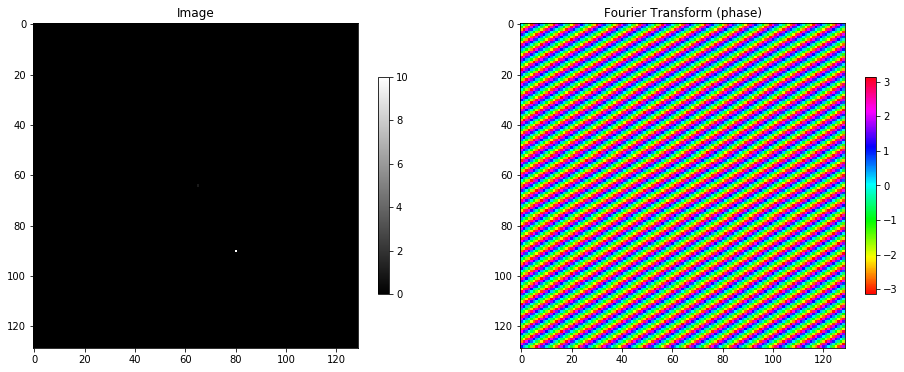

In [38]:
imgSize = 128

multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 0.1])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 1.0])
multipleSourcesFFT(imgSize, [[64, 65], [90,80]], [1., 10.])

*左：固定两个点源的位置，中心位置的点源幅值为1，另一个点源幅值分别为0.1、1、10。右：频域的相位，相位值为每个点源相位的加权平均（以点源的幅值为权重）。Left: two point sources at fixed positions with the central source having unity amplitude and the further out source having an amplitude of 0.1, 1, 10 for each row. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

在图像中加入两个以上的源，傅立叶变换后的相位图变得非常复杂。

Once we start including more than two sources in the image we can see the resulting spatial frequency plots can become very complex.

FFT Max: 1.7999999999999998 Min: 0.0031074724915089126


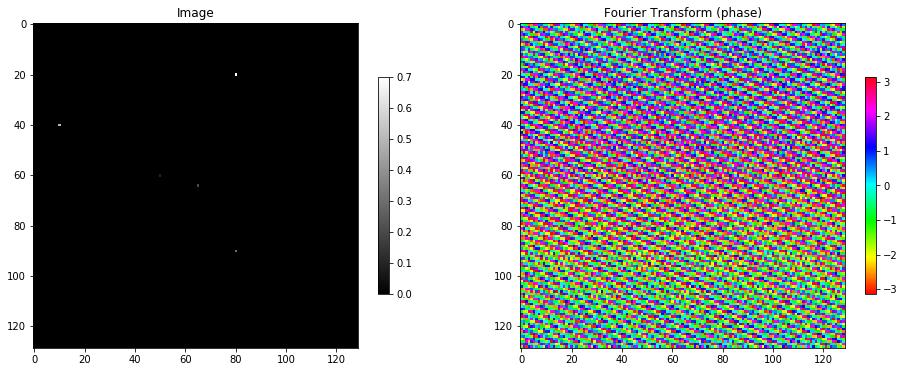

In [43]:
multipleSourcesFFT(imgSize, [[64,65], [90,80], [40,10], [60,50], [20,80]], [.2, 0.3, 0.5, 0.1, 0.7])

*左：五个点源，中心位置的源的幅值为0.2，其它4个点源的幅值分别为0.3、0.5、0.1、0.7。右：频域的相位图，相位值为各点源相位的加权平均（权重为幅值）。Left: five point sources at fixed positions with the central source having an amplitude of $0.2$ and the further out sources having an amplitude of $0.3$, $0.5$, $0.1$, and $0.7$. Right: the resulting phases which are an amplitude weighted average of the phases of each individual source.*

### 5.1.5 从可见度采样构建图像 Building up an Image from Sampled Visibilities<a id='imaging:sec:ftsampVis'></a>

前面已经说过空域和频域是一组傅立叶对，因此我们在频域（可见度域）进行采样，然后对采样结果做傅立叶变换，得到这些点源的空域信息，也就是点源的图像。这听上去有点奇怪，下面以例子说明。

Now, since we stated at the beginning of this section that the spatial domain and spatial frequency domain are Fourier pairs we can think about these point source examples as a sampling in the spatial frequency (visibility) domain and the resulting Fourier transformed signal as an image using this sampling. This may sound odd, but let us use an example to show what this means.

对前面的野鸭图做傅立叶变换，然后通过”采样函数“（下节 [$\S$ 5.2 &#10142;](5_2_sampling_functions_and_psfs.ipynb)有详细介绍）对它进行采样，再做逆变换得到一张新图像。

Starting from the Fourier transformed duck image shown at the beginning of the section, we can construct a new image by selecting a few sample points with what is called a *sampling function* (more on this in the next in [$\S$ 5.2 &#10142;](5_2_sampling_functions_and_psfs.ipynb)) in the spatial frequency domain and creating a new image.

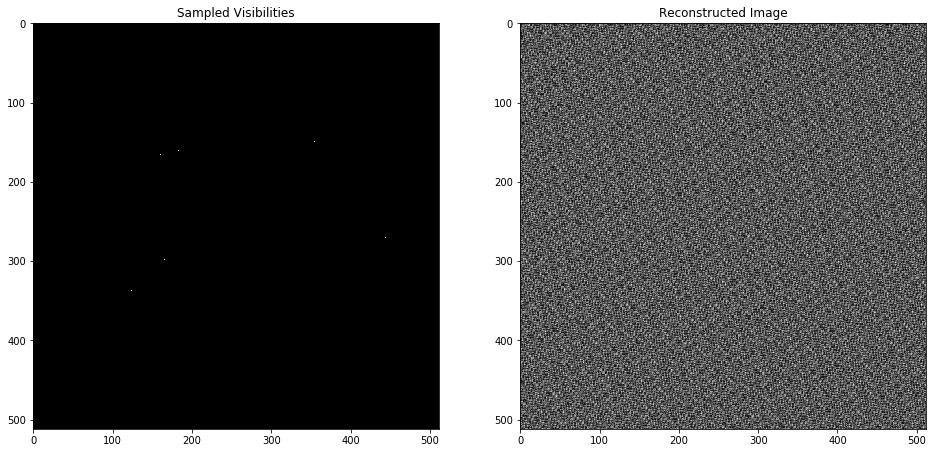

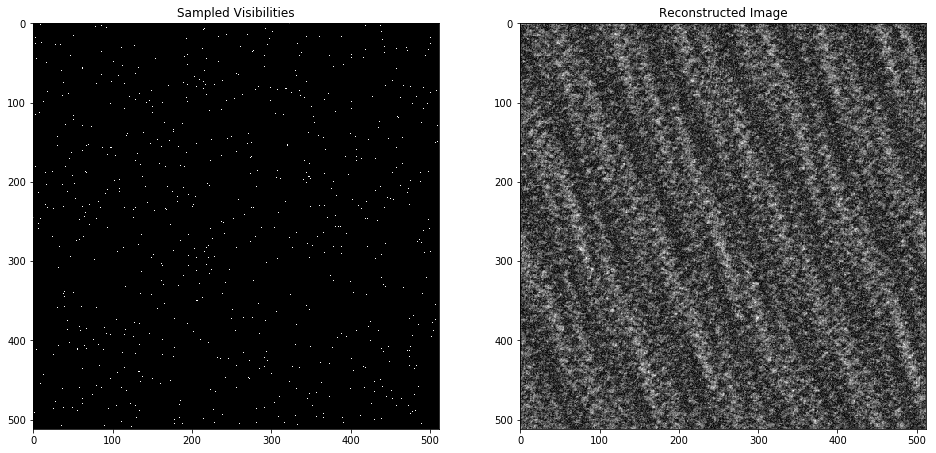

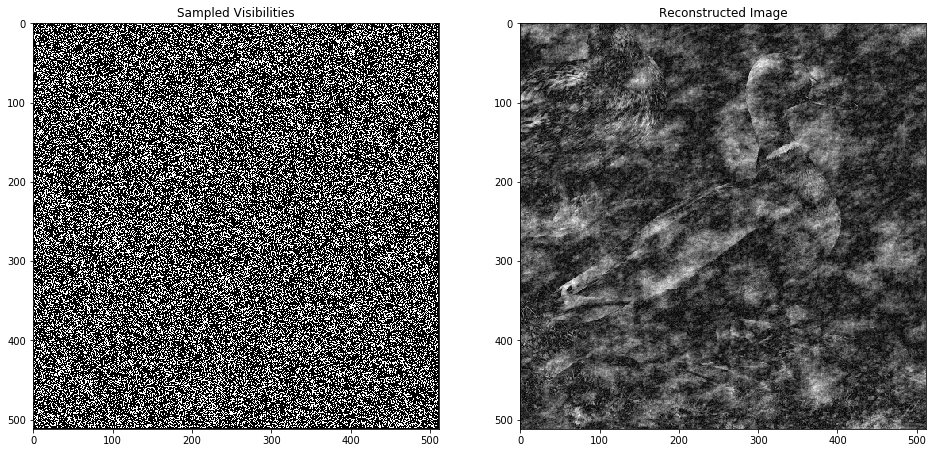

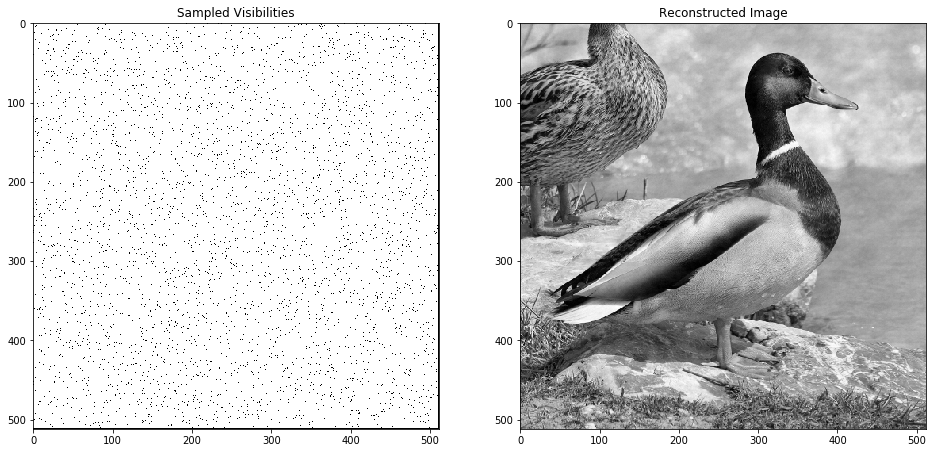

In [44]:
fftDuck = np.fft.fftshift(np.fft.fft2(gDuck))

def reconstructImage(vis, nsamples):
    """randomly select a few values from the spatial frequency (visibility) domain
    and reconstruct the image with those samples. To do a full reconstruction of the
    image, nsamples needs to be larger than the total number of pixels in the image
    because the np.random.randint() chooses with replacement so positions will be
    doubles counted"""
    subVis = np.zeros_like(vis)
    ypos = np.random.randint(0, vis.shape[0]-1, size=nsamples)
    xpos = np.random.randint(0, vis.shape[1]-1, size=nsamples)
    subVis[ypos, xpos] = vis[ypos, xpos] #insert a subset of visibilities
    newImg = np.abs(np.fft.ifft2(np.fft.fftshift(subVis)))
    
    fig, axes = plt.subplots(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.title('Sampled Visibilities')
    plt.imshow(np.abs(subVis).astype(bool), interpolation='nearest')
    plt.set_cmap('gray')
    
    plt.subplot(1,2,2)
    plt.title('Reconstructed Image')
    plt.imshow(newImg)
    plt.set_cmap('gray')

reconstructImage(fftDuck, int(1e1))

reconstructImage(fftDuck, int(1e3))

reconstructImage(fftDuck, int(1e5))

reconstructImage(fftDuck, int(1e6))

*图：通过频域采样（左）所获得的重建图（右）。Figures: the reconstructed images (right) using the spatial frequency domain sampled positions (left).*

在频域进行少量采样，重建得到的图看上去像是一系列幅度和方向都随机的正弦波的集合（右上图）。但是，随着采样点的逐渐增加，重建图上慢慢出现了结构，最终显现出原图中的鸭子形象。本质上来讲，我们只是给一系列频率赋予了不同的幅值，然后恰好就生成得到了一张鸭子的图，理论上来说，我们可以通过在频率空间设置一系列的幅值和相位，从而构造出任何图像。

By only using a few sampled spatial frequency modes the resulting image (top right) looks only like a collection of sinusoidal waves with random amplitudes and orientations. But, as we progressively increase the number of sampled positions structure starts to appear until eventually the original duck image re-emerges. Basically, we are selecting a collection of spatial frequencies, giving them different amplitudes and creating an image out of those components, we just happen to be picking ones such that we are constructing a duck. But, any image can be constructed by setting the correct amplitudes and phases of various spatial frequencies.

我们可以看到，即使没有对可见度空间做完整采样，但是只要采样点足够，我们也能得到跟原图几乎一样的重建图（右下图）。下一节我们将介绍如何克服观测仪器的物理上的制约，在不完整采样的基础上重建图像。

In the final image we can see the visibility space is not fully sampled, but since the majority of positions are sampled it is difficult to see any difference in the resulting image compared to the original. This is an important point, we don't need to sample all the spatial frequency modes to reconstruct an image that is very similar to the original. And, this point leads us into the next section where we are faced with physical limits on the instruments we can build and how we construct images from interferometric visibilities.

***

Next: [5.2 Sampling and Point Spread Functions](5_2_sampling_functions_and_psfs.ipynb)